In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#We have to create a model which predicts the next digit given the previous digit
#for eg- if we give 4 5 6 7 8 9 10 the prediction should be 11 (we would be using length of 7)

#Firstly lets prepare the data

data = [[[(i+j)/100] for i in range(7)] for j in range(100)]
target = [(i+7)/100 for i in range(100)]

In [0]:
data= np.array(data, dtype=float)
target = np.array(target, dtype=float)

In [30]:
data.shape

(100, 7, 1)

In [31]:
target.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state = 5)

In [0]:
#RNN will be implemented now

model = Sequential()

In [0]:
#Now here we will be adding the parameters of LSTM
#The fist 1 parameter determines the output size 
#Batch input shape describes the input shape of the data
#format no of inputs, length of sequence,length of each vector
model.add(LSTM((1),batch_input_shape=(None,7,1),return_sequences= False))

In [0]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 0s 410us/step - loss: 0.3077 - acc: 0.0000e+00 - val_loss: 0.2028 - val_acc: 0.0000e+00
Epoch 2/500
80/80 [==============================] - 0s 275us/step - loss: 0.3043 - acc: 0.0000e+00 - val_loss: 0.1999 - val_acc: 0.0000e+00
Epoch 3/500
80/80 [==============================] - 0s 312us/step - loss: 0.3012 - acc: 0.0000e+00 - val_loss: 0.1970 - val_acc: 0.0000e+00
Epoch 4/500
80/80 [==============================] - 0s 320us/step - loss: 0.2980 - acc: 0.0000e+00 - val_loss: 0.1941 - val_acc: 0.0000e+00
Epoch 5/500
80/80 [==============================] - 0s 282us/step - loss: 0.2948 - acc: 0.0000e+00 - val_loss: 0.1913 - val_acc: 0.0000e+00
Epoch 6/500
80/80 [==============================] - 0s 290us/step - loss: 0.2920 - acc: 0.0000e+00 - val_loss: 0.1885 - val_acc: 0.0000e+00
Epoch 7/500
80/80 [==============================] - 0s 290us/step - loss: 0.2896 - acc: 0.0000e+00 - val_loss

In [0]:
results = model.predict(x_test)

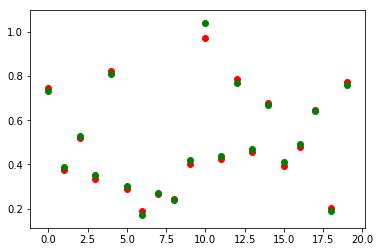

In [47]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

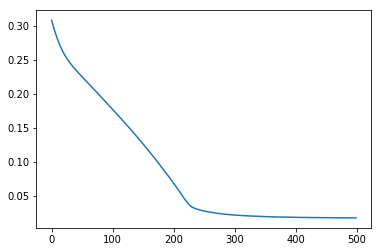

In [48]:
plt.plot(history.history['loss'])
plt.show()

In [0]:
#We learned 2 things firstly when we setted epoch to 50 and we didnt normalize our data we did not get good results
#but after normalizing and increasing the epoch to 500 our model fitted almost perfectly
#We can also add a new layer which will considerably decrease the epochs required for convergence